In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_color_codes =True
from scipy.stats import stats
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, SMOTENC


# • DOMAIN: Medical
• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.
• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

# 1. Data Understanding: [5 Marks]
A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

D. Print DataTypes of all the 3 DataFrames. [1 Mark]

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

# A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]


In [2]:
d1 = pd.read_csv ('Normal.csv')
d2 = pd.read_csv ('Type_H.csv')
d3 = pd.read_csv ('Type_S.csv')

# B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

In [3]:
print (d1.shape)
print (d2.shape)
print (d3.shape)

(100, 7)
(60, 7)
(150, 7)


d1 has 100 Rows 7 Columns
d2 has 60 Rows 7 Columns
d3 has 150 Rows 7 Columns

# C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

In [4]:
d1.columns==d2.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [5]:
d1.columns==d3.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [6]:
d2.columns==d3.columns

array([ True,  True,  True,  True,  True,  True,  True])

All 3 DataFrames have same Column names (features).

# D. Print DataTypes of all the 3 DataFrames. [1 Mark]

In [7]:
print (d1.dtypes)
print (d2.dtypes)
print (d3.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


# E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

In [8]:
d1.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [9]:
d2.Class.value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [10]:
d3.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

Class -Type_S have highest value_count 150 among the 3 classes (Normal, Type_H and Type_S)

Class -Type_H have lowest value_count 60 among the 3 classes (Normal, Type_H and Type_S)

Class -Normal CLass have count of 100

# 2. Data Preparation and Exploration: [5 Marks]
A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’


B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

Checkpoint: Expected Output shape = (310,7)

C. Print 5 random samples of this DataFrame [1 Marks]

D. Print Feature-wise percentage of Null values. [1 Mark]

E. Check 5-point summary of the new DataFrame. [1 Mark]

# A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

In [11]:
d1.Class = d1.Class.replace ('Nrmal', 'Normal' )
d2.Class = d2.Class.replace ('type_h', 'Type_H' )
d3.Class = d3.Class.replace ('tp_s', 'Type_S' )

In [12]:
print (d1.Class.value_counts())
print (d2.Class.value_counts())
print (d3.Class.value_counts())

Normal    100
Name: Class, dtype: int64
Type_H    60
Name: Class, dtype: int64
Type_S    150
Name: Class, dtype: int64


# B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

Checkpoint: Expected Output shape = (310,7)

In [17]:
df = pd.concat([d1,d2,d3], axis=0)

In [18]:
# df = pd.concat([d1,d2,d3], axis=1)
# This will concat the dataframes horizontally

In [19]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [21]:
df1 = df.reset_index (drop=True) # updating Data to new DataFrame

In [22]:
df1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


# C. Print 5 random samples of this DataFrame [1 Marks]

In [23]:
df1.sample(5)
# This command will give 5 random samples of this DataFrame

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
279,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,Type_S
264,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,Type_S
61,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


# D. Print Feature-wise percentage of Null values. [1 Mark]

In [18]:
for i in df1.columns:
    print ('Percentage of null values in {} : {}'.format(i, df1[i].isnull().sum()/len(df1.index)*100))
    

Percentage of null values in P_incidence : 0.0
Percentage of null values in P_tilt : 0.0
Percentage of null values in L_angle : 0.0
Percentage of null values in S_slope : 0.0
Percentage of null values in P_radius : 0.0
Percentage of null values in S_Degree : 0.0
Percentage of null values in Class : 0.0


# E. Check 5-point summary of the new DataFrame. [1 Mark]

In [19]:
df1.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# 5 Point summary of all features mentioned below: 

P_incidence:

Mean and Median(50%) are nearly equal, Distribution might be normal. 75 % of values are less than 72 but maxiumum value is 129, there we need to look for outliars.

P_tilt:

Mean and Median(50%) are nearly equal, Distribution might be normal.

It contains negative values.

75 % of values are less than 22 but maximum value is 49 so there might be right skewness

L_angle:

Mean and Median are nearly equal, Distribution might be normal

There might be few outliers because of the maximum value, 75% of values are lesser than 63 but maximum value is 125.

S_slope:

Mean and Median are nearly equal.

Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.

P_radius:

Distribution might be normal.

There is no much Deviation.

S_Degree:

Mean is greater than Median so there might be right skewness in the data .

We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data. Also it contains negative values.

# 3. Data Analysis: [10 Marks]

A. Visualize a heatmap to understand correlation between all features [2 Marks]

B. Share insights on correlation. [2 Marks]

        A. Features having stronger correlation with correlation value.

        B. Features having weaker correlation with correlation value.


C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

# A. Visualize a heatmap to understand correlation between all features [2 Marks]

In [25]:
df1.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

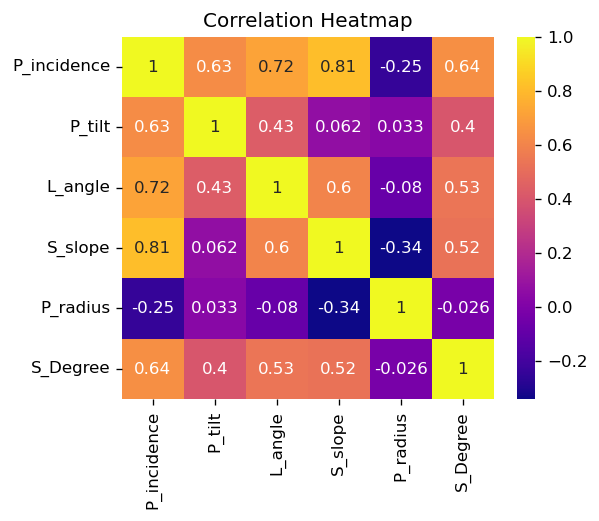

In [24]:
plt.figure (dpi= 120 , figsize=(5,4))
sns.heatmap (df1.corr(), annot= True, cmap= 'plasma')
plt.title('Correlation Heatmap')


# B. Share insights on correlation. [2 Marks]
A. Features having stronger correlation with correlation value.

B. Features having weaker correlation with correlation value.

A. Features having stronger correlation with correlation value.

Solution :

S_slope have Strong Positive correlation of 0.81 with P_incidence

L_angle have Strong Positive correlation of 0.72 with P_incidence

P_tilt have high Positive correlation of 0.63 with P_incidence

S_degree have high Positive correlation of 0.64 with P_incidence

B. Features having weaker correlation with correlation value.

Solution:

P_radius is having weak negative correlation of -0.25 with P_incidence

P_radius is having weak negative correlation of -0.34 with S_slope

P_tilt is having Weak Positive correlation of 0.4 with S_degree

P_tilt is having Weak Positive correlation of 0.43 with L_angle


P_radius is having no correlation or Weak Correlation with P_tilt (0.033), L_angle(-0.08) and S_degree (-0.026). The correlation values here are very low( near to 'Zero') so can be consider as NO correlation.

# C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

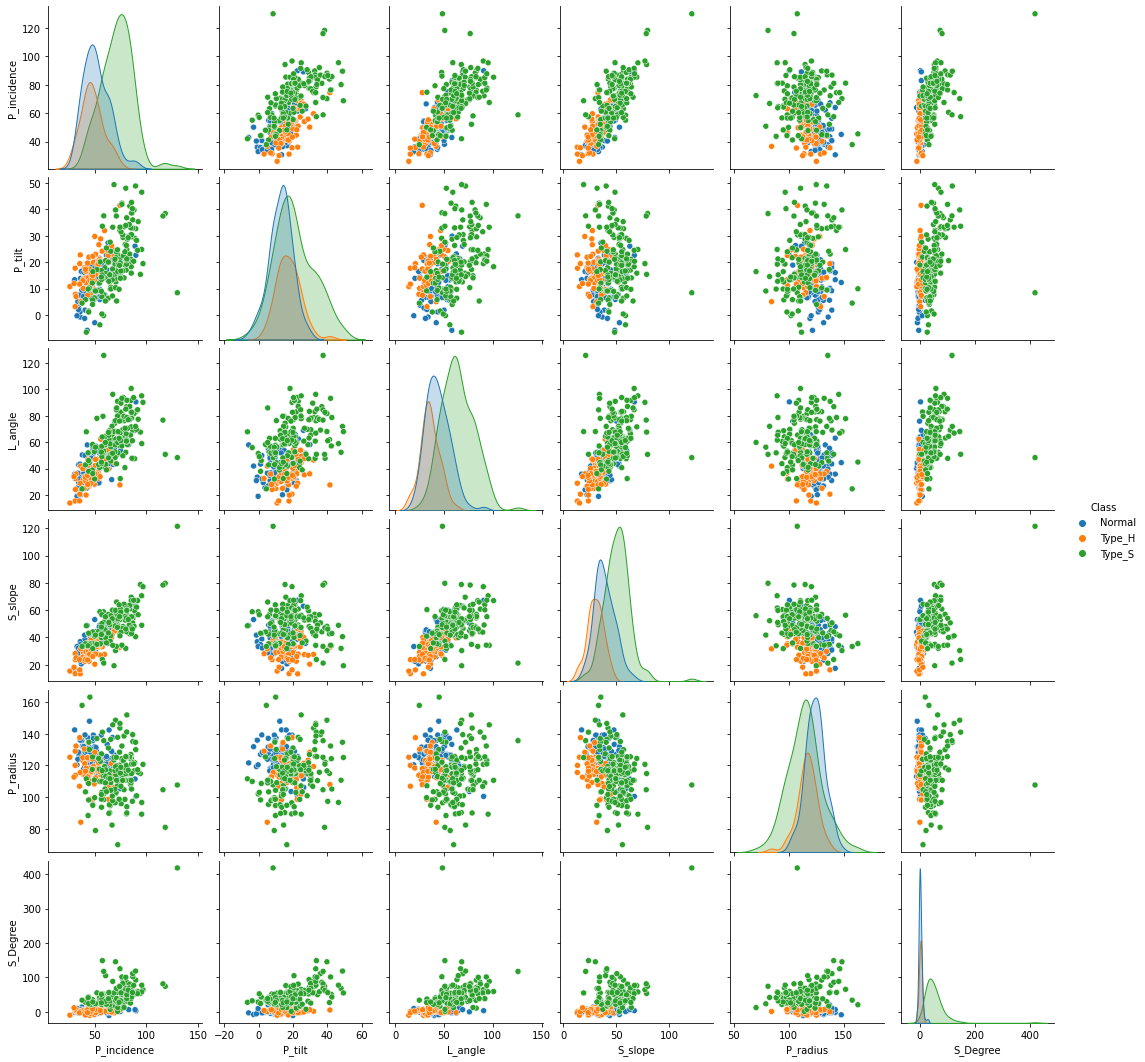

In [21]:
sns.pairplot (df1, hue = 'Class')

Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well.

It is evident that Type_S class is have high count compared to other two.

Normal class has higher values compared to Type_H.

# D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

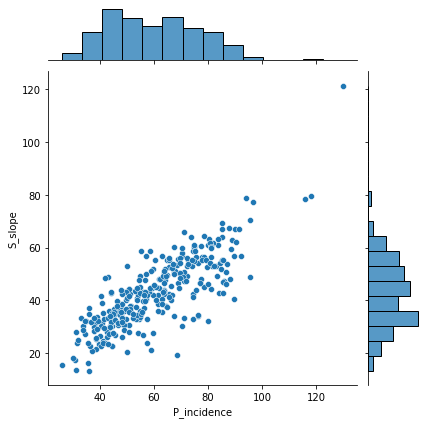

In [22]:
sns.jointplot (df1['P_incidence'],df1['S_slope'])


As per above plot, P_incidence and S_slope have strong Positive correlation.

There are some outliars as well that we can see in this graph.




# E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

Text(0.5, 1.0, 'Box plot - S_Degree')

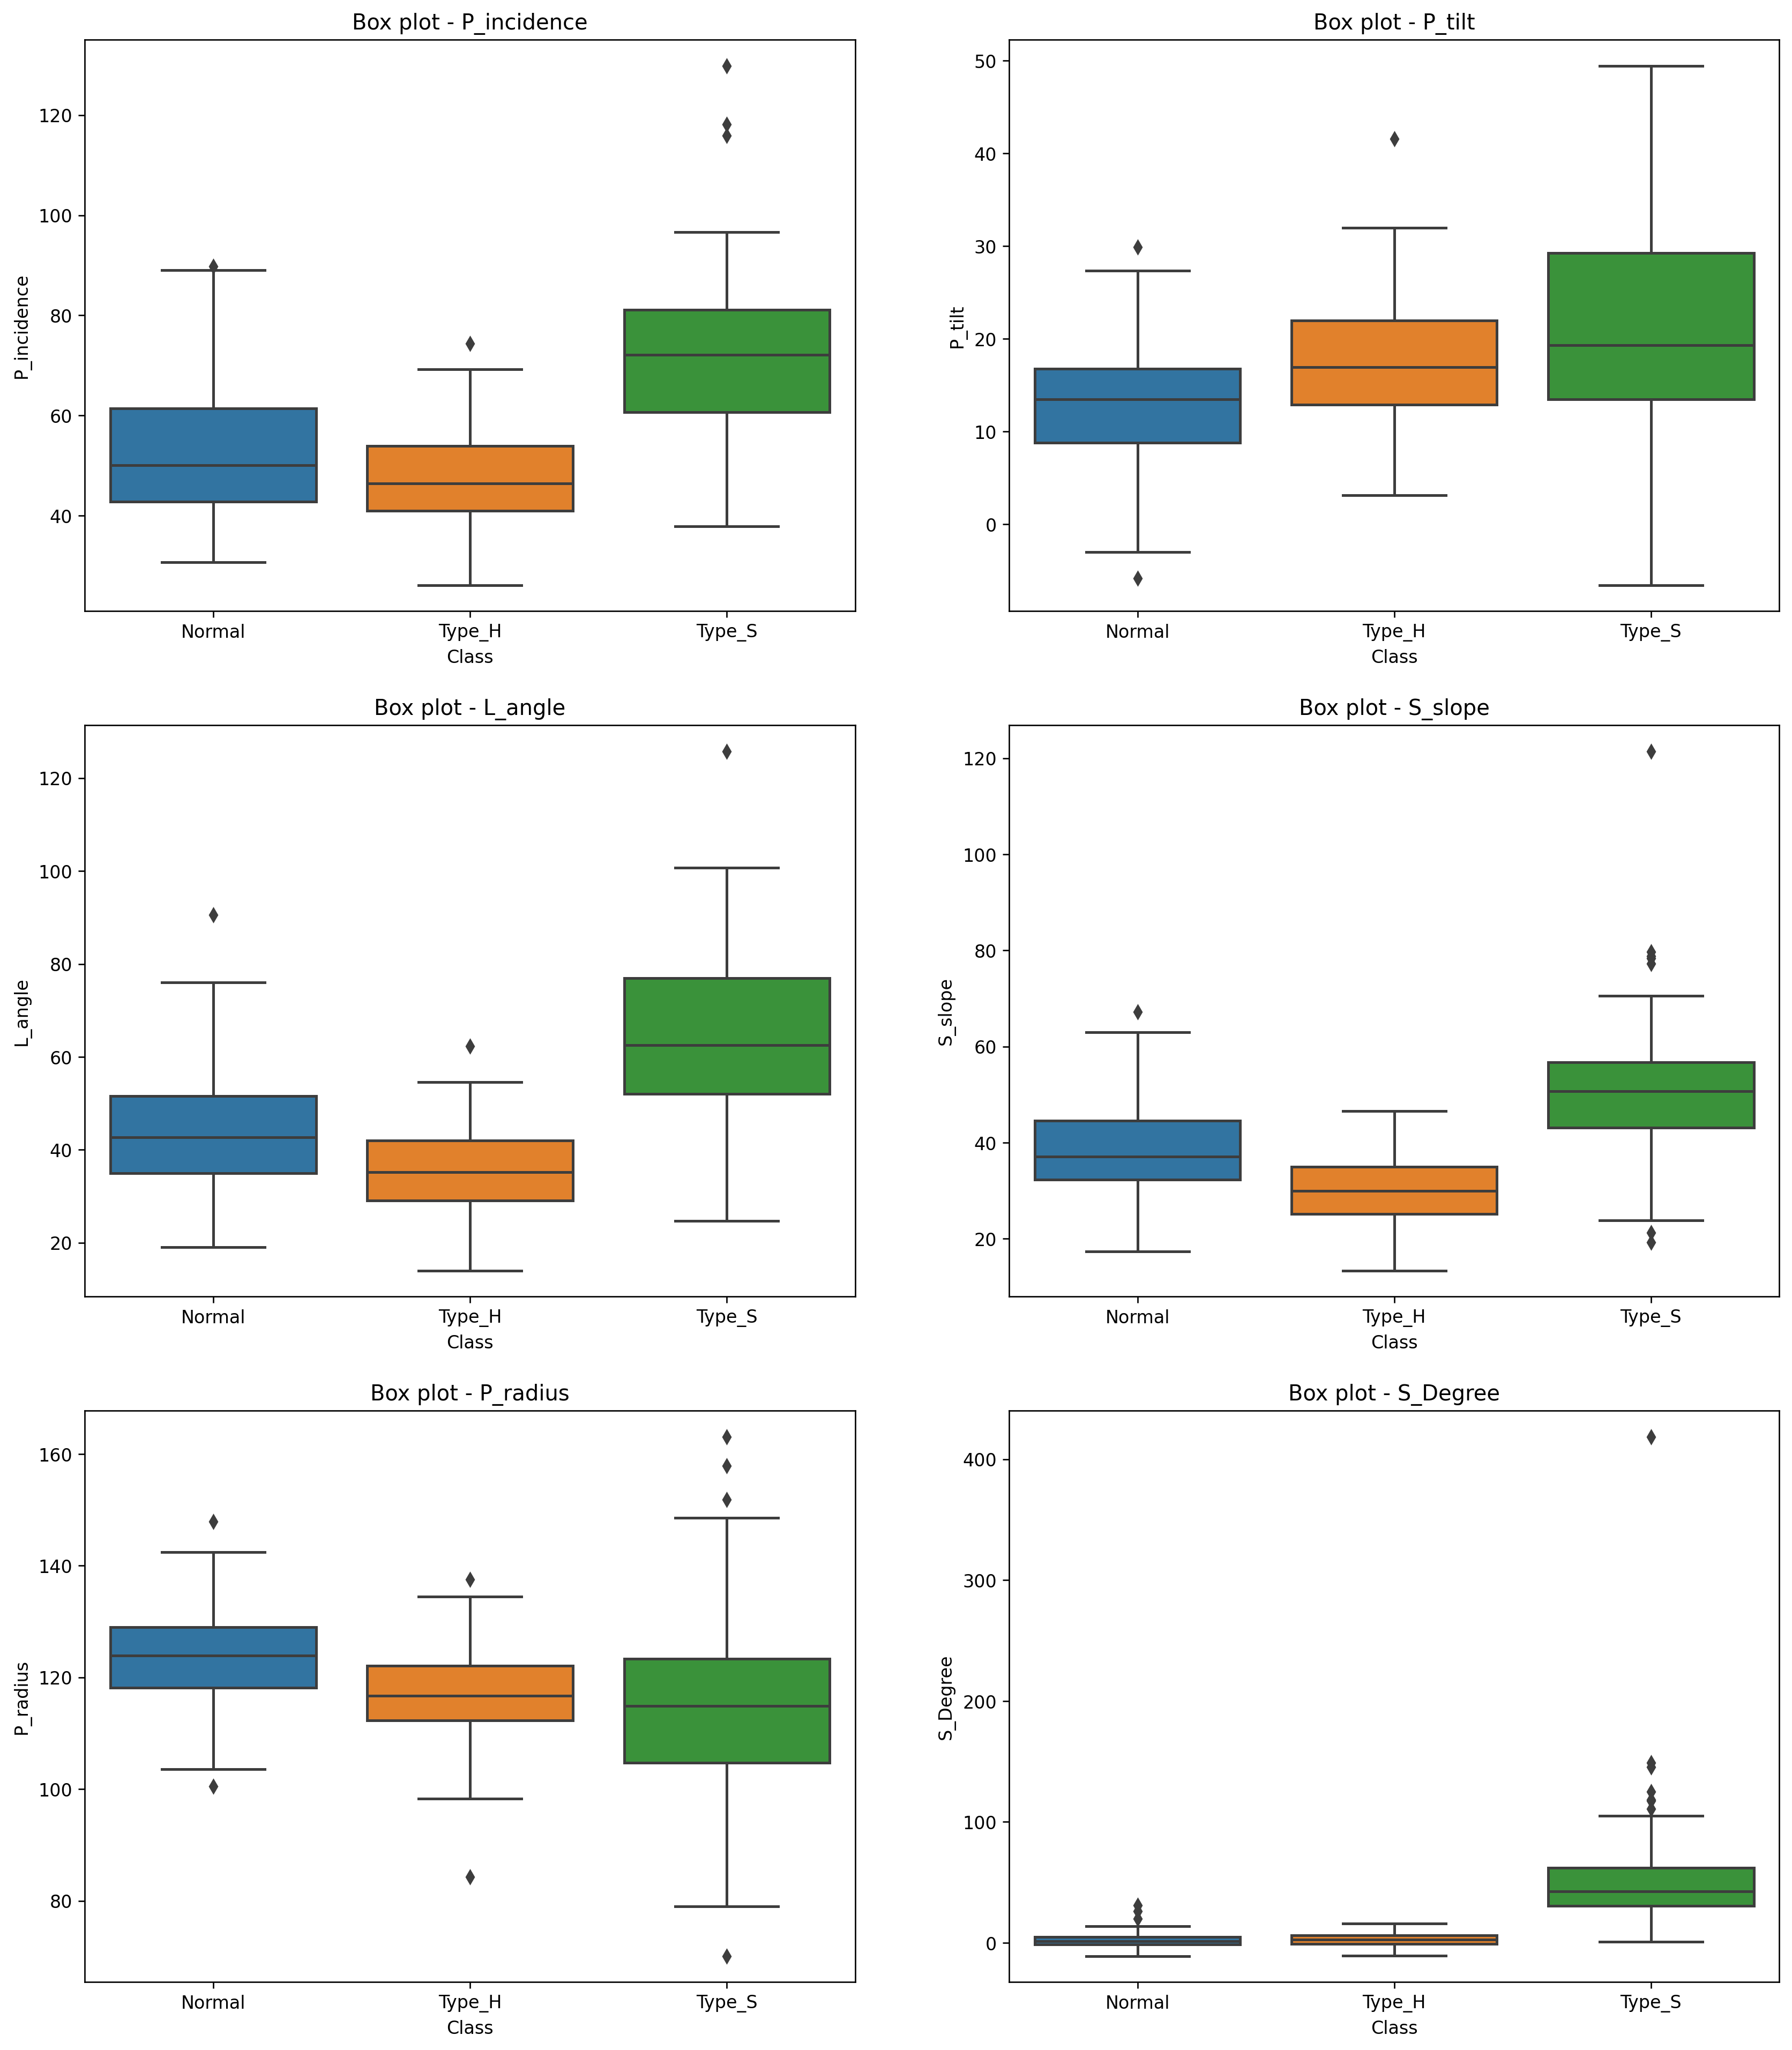

In [23]:
f, axes = plt.subplots( 3,2, figsize=(17,20),dpi =240)
sns.boxplot(x ='Class', y = 'P_incidence', data=df,  orient='v'  , ax = axes[0,0])
sns.boxplot(x ='Class', y = 'P_tilt', data=df,  orient='v' , ax = axes[0,1])
sns.boxplot(x ='Class', y = 'L_angle', data=df,  orient='v' , ax = axes[1,0])
sns.boxplot(x ='Class', y = 'S_slope', data=df,  orient='v' , ax = axes[1,1])
sns.boxplot(x ='Class', y = 'P_radius', data=df,  orient='v' , ax = axes[2,0])
sns.boxplot(x ='Class', y = 'S_Degree', data=df,  orient='v' , ax = axes[2,1])

axes[0,0].set_title('Box plot - P_incidence')
axes[0,1].set_title('Box plot - P_tilt')
axes[1,0].set_title('Box plot - L_angle')
axes[1,1].set_title('Box plot - S_slope')
axes[2,0].set_title('Box plot - P_radius')
axes[2,1].set_title('Box plot - S_Degree')

P_incidence : P_incidence Value is larger for Type_S Class. We can see some extreme values as well, Normal Value is slightly higher than Type_H.


P_tilt :  Mean of Type_S is slightly higher than rest two, Few cases Normal and Type_H also has Outliars.


L_angle : L_Angle has higher value (outliar) for Type_S Class, We can see Normal class has higher values compared to type_H class, Each class contains one outlier.


S_slope : S_slope has huge values (Outliar) for Type_S class, Normal class has high S_slope compared to Type_H.


P_radius : We can see P_radius value is more for Normal Class, There is some extreme values for Type_s class, All classes has higher and lower Values (Outliars).


S_degree : S_Degree has extreme values for type_S Class , Few Normal class also have Outliars for S_Degree.


With the above Box plot we can say that Outliars are clearly visible here.

However these outliars are class based instead of feature based, we need to check the Outliars count in the feature as well.
It could be possible that what is showing as Outliar as classwise may not be an actual Outliar.

In [30]:
Q1 = np.percentile(df['P_incidence'],25)
print (Q1)

print (np.quantile(df['P_incidence'], 0.25 ))

46.43029421
46.43029421


In [24]:
#checking count of outliers in various features 

Columns = ['P_incidence',  'P_tilt', 'L_angle','S_slope','P_radius', 'S_Degree']
df_Outliars = []
for i in Columns: 
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile (df[i],75)
    IQR=Q3-Q1
    Threshold=IQR*1.5
    lower = Q1-Threshold
    upper = Q3+Threshold
    Outliars= [k for k in df[i] if k < lower or k > upper]
   
    df_Outliars.append(Outliars)
    
j=0
for i in Columns:
    print('Total Number of outliers in {} : {}'.format(i, len(df_Outliars[j])))
    j=j+1
    print ()
    

Total Number of outliers in P_incidence : 3

Total Number of outliers in P_tilt : 13

Total Number of outliers in L_angle : 1

Total Number of outliers in S_slope : 1

Total Number of outliers in P_radius : 11

Total Number of outliers in S_Degree : 10



Feature wise Outliar values are mentioned above. As predicted above the outliars that we observed Class-wise are not found as True Outliars when we calcuated for the Features.

We can treat these outliars with Median Values.

Text(0.5, 1.0, 'Distribution of S_Degree')

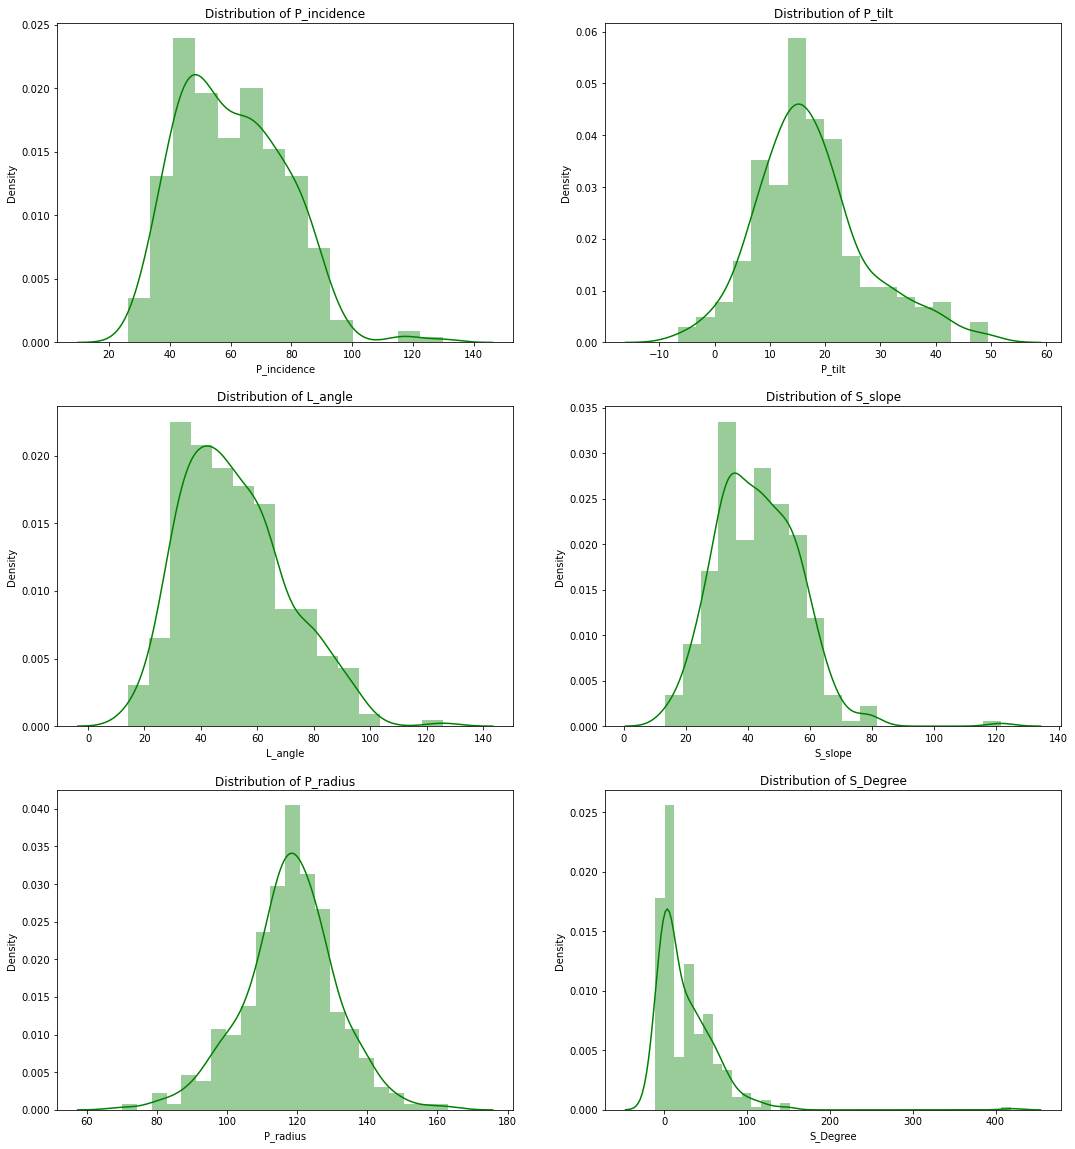

In [25]:
# Lets check distribution of Features 

f, axes = plt.subplots (3,2, figsize = (18,20))
sns.distplot (df['P_incidence'], ax=axes[0,0],color='Green' )
sns.distplot (df['P_tilt'], ax=axes[0,1],color='Green' )
sns.distplot (df['L_angle'], ax=axes[1,0],color='Green' )
sns.distplot (df['S_slope'], ax=axes[1,1],color='Green' )
sns.distplot (df['P_radius'], ax=axes[2,0],color='Green' )
sns.distplot (df['S_Degree'], ax=axes[2,1],color='Green' )

axes[0,0].set_title('Distribution of P_incidence')
axes[0,1].set_title('Distribution of P_tilt')
axes[1,0].set_title('Distribution of L_angle')
axes[1,1].set_title('Distribution of S_slope')
axes[2,0].set_title('Distribution of P_radius')
axes[2,1].set_title('Distribution of S_Degree')

Observations:

P_incidence: Normality is maintained with very less extreme values.

P_tilt: Data is Normally distributed and we can see one peakness in the center. It is has little skewness towards right side.

L_angle: It is Normally distributed , Little right skewness because of one outlier

S_slope: There is right skewness is here due to one outlier

P_radius: Data is normally distributed, We can see outliers at both the ends.

S_Degree: There is Positive Skewness in the data Hugely affected by Outliers

In [26]:
# # Lets Treat Ouliars in each Feature

# Columns = ['P_incidence',  'P_tilt', 'L_angle','S_slope','P_radius', 'S_Degree']
# df_Outliars    
# for i in Columns: 
#     Q1 = np.percentile(df[i],25)
#     Q3 = np.percentile (df[i],75)
#     IQR=Q3-Q1
#     Threshold=IQR*1.5
#     lower = Q1-Threshold
#     upper = Q3+Threshold
#     Outliars= [k for k in df[i] if k < lower or k > upper]
#     df_Outliars.append(Outliars)
# j=0
# for i in Columns:
#     df[i] = df[i].replace(df_Outliars[j], df[i].median())
#     j=j+1

# 4. Model Building: [6 Marks]

A. Split data into X and Y. [1 Marks]


B. Split data into train and test with 80:20 proportion. [1 Marks]

C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

D. Print all the possible performance metrics for both train and test data. [2 Marks]

# A. Split data into X and Y. [1 Marks]

In [27]:
X  = df.drop(['Class'], axis =1)
y = df['Class']


# B. Split data into train and test with 80:20 proportion. [1 Marks]

In [28]:
# convert the features into z scores as we do not know what units/scales were used.
# It is always adviced to scale numeric attributes in models that calculate distances

X_scaled= X.apply(zscore)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, test_size=0.2, random_state=15)


# C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

In [29]:
knn = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) 

In [30]:
knn.fit (X_train, y_train)

KNeighborsClassifier(metric='euclidean')

# D. Print all the possible performance metrics for both train and test data. [2 Marks]

In [31]:
y_predict = knn.predict (X_test)

In [32]:
#Accuracy Score
print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )

Accuracy on Training data: 0.8266129032258065
Accuracy on Test data: 0.7580645161290323


Training_set accuracy is 82% while Test_set accuracy is 75%, seems the model is fitting good as there no much difference in Training and Testing results, however both the scores are about 80%, lets check other performance metrics as well and then treat the model for optimal result.

Confusion Matrix: 
 [[12  5  4]
 [ 3  9  1]
 [ 2  0 26]]


<AxesSubplot:>

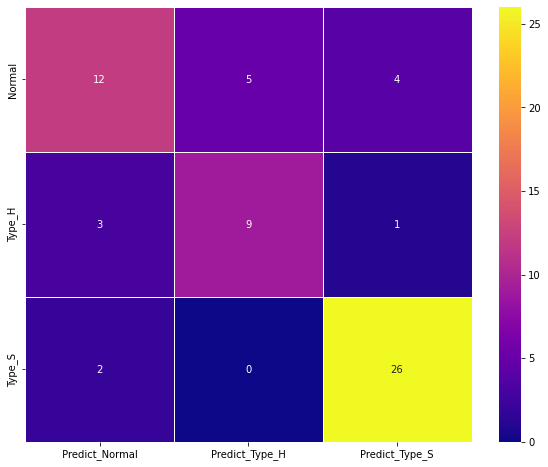

In [33]:
# confusion_matrix

cm  = confusion_matrix (y_test, y_predict )

print ('Confusion Matrix: \n', cm)

df_cm = pd.DataFrame (cm, index=[i for i in ['Normal', 'Type_H','Type_S']],
                      columns=[i for i in [' Predict_Normal ', 'Predict_Type_H','Predict_Type_S']])

plt.figure (figsize= (10,8))
sns.heatmap (df_cm, cmap= 'plasma', annot= True, linecolor='white', linewidths=1)

Our model predicts Type_S correctly most of the time, there is only 2 misclassification and 26 correct classification.

For Type_H class, there are total 4 misclassification and 9 correct classification. 

For Normal Type we have total 12 correct classification and 9 misclassification. Misclassification is high here.

With above map we can say that our model predicting good for Type_S class,though, for Normal Class and Type_H there is high misclassification.

In [34]:
# Lets check Classification Report - 

print ("Classification Report : \n\n", classification_report(y_test, y_predict))

Classification Report : 

               precision    recall  f1-score   support

      Normal       0.71      0.57      0.63        21
      Type_H       0.64      0.69      0.67        13
      Type_S       0.84      0.93      0.88        28

    accuracy                           0.76        62
   macro avg       0.73      0.73      0.73        62
weighted avg       0.75      0.76      0.75        62



Precesion shows fraction of accuracy of correctly predicted classes between y_test and y_predict

Recall(sensitivity or TPR) shows fraction of accuracy of correctly predicted classes between y_test and y_predict

Class- Normal : predicted correctly for 72% of time as per precision value while Recall value is 62% and F1 score is 67% 
    
Class- Type_H : predicted correctly for 62% of time for precision, Recall and F1 score
    
Class- Type_S : predicted correctly for 90% of time as per precision value while Recall value is 100% and F1 score is 95%

As per above details, it is clear that different tests give us better undersatnding of results. 

We can clearly see that Type_H-Class has No variation in test value in all of the tests (Precesion, Recall and F1)

We have maximum F1 score and Recall and Precision for Class-Type_S.

# 5. Performance Improvement:
A. Experiment with various parameters to improve performance of the base model. [2 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

B. Clearly showcase improvement in performance achieved. [1 Marks]

For Example:

        A. Accuracy: +15% improvement

        B. Precision: +10% improvement.
C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

# A. Experiment with various parameters to improve performance of the base model. [2 Marks]

 The main Feature is K(number of neighbours) used in KNN algorithm, lets try to find the best K value for this model also we will check other parameters. Lets treat outliars and then check improvement in model

In [35]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean')#,weights='uniform', algorithm = 'auto', leaf_size=30, p=2 ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

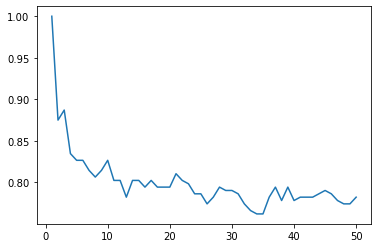

In [36]:
# lets check performance of this model on training set with the help of plot
plt.plot(range(1,51),train_score)
plt.show()

Seems Accuracy is decreasing with increasing value of K 

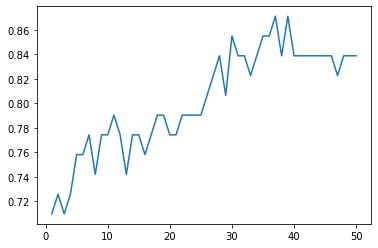

In [37]:
# lets check performance of this model on Testing set with the help of plot
plt.plot(range(1,51),test_score)
plt.show()

seems Accuracy increasing with vslue of K.

Highest accuracy achieved is around 84% when K value between 40 and 50.

Lets try to find the best model with the help of Cross validation:

In [38]:
# We are using some parameters here on GridSearch CV to check the performance and to find the best parameters -
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}


#using gridsearch to test all values for n_neighbors
KNN_gscv = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')

#fit model to data
KNN_gscv.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=50),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [39]:
# checking for best score after cross validation
KNN_gscv.best_score_

0.7987755102040817

In [40]:
KNN_gscv.best_params_

{'n_neighbors': 16}

# B. Clearly showcase improvement in performance achieved. [1 Marks]

For Example:

    A. Accuracy: +15% improvement

    B. Precision: +10% improvement.

In [41]:
# Lets check the accuracy of new Model
from sklearn.metrics import accuracy_score
y_predicted = KNN_gscv.predict (X_test)

print('Accuracy on Training data:',KNN_gscv.score(X_train, y_train) )

print('Accuracy on Test data:',KNN_gscv.score(X_test, y_test) )


print ("Classification Report : \n\n", classification_report(y_test, y_predicted))

Accuracy on Training data: 0.7943548387096774
Accuracy on Test data: 0.7580645161290323
Classification Report : 

               precision    recall  f1-score   support

      Normal       0.68      0.62      0.65        21
      Type_H       0.67      0.62      0.64        13
      Type_S       0.84      0.93      0.88        28

    accuracy                           0.76        62
   macro avg       0.73      0.72      0.72        62
weighted avg       0.75      0.76      0.75        62



In [45]:
KNN_2 = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean',weights='uniform', algorithm = 'auto', leaf_size=30, p=2 ) 
KNN_2.fit(X_train, y_train)
print (KNN_2.score(X_train, y_train))
print (KNN_2.score(X_test, y_test))

0.782258064516129
0.8387096774193549


In [ ]:
KNN_2.